In [1]:
from sklearn.decomposition import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.manifold import *
from umap import UMAP
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ridge_regression_per_country.csv', index_col = 0)

In [4]:
df.head()

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff,Test_Score,Export_GDP_Correlation
Country,,,,,,
ABW,8.976353e+08,5.113224e+07,1.152446e+08,-1.476394e+08,0.899756,0.289910
AGO,4.634761e+09,2.711559e+08,1.538319e+10,2.169301e+10,0.950912,0.967478
ALB,-1.571333e+09,-6.087597e+07,2.468347e+09,8.630143e+08,0.962760,0.945574
ARM,-1.745901e+09,1.116702e+08,2.216075e+09,5.721911e+08,0.831801,0.897635
ATG,1.695626e+08,-7.571696e+06,1.064506e+08,9.263797e+06,0.950231,-0.088238


In [5]:
df.drop(columns = ['Test_Score', 'Export_GDP_Correlation'], inplace = True)

In [6]:
df

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
ABW,8.976353e+08,5.113224e+07,1.152446e+08,-1.476394e+08
AGO,4.634761e+09,2.711559e+08,1.538319e+10,2.169301e+10
ALB,-1.571333e+09,-6.087597e+07,2.468347e+09,8.630143e+08
ARM,-1.745901e+09,1.116702e+08,2.216075e+09,5.721911e+08
ATG,1.695626e+08,-7.571696e+06,1.064506e+08,9.263797e+06
...,...,...,...,...
VUT,1.558788e+08,6.659406e+06,1.001144e+08,4.159328e+07
WSM,1.203059e+08,9.652454e+06,1.818198e+08,-7.350840e+06
YEM,3.696716e+09,3.526223e+09,9.709729e+09,-3.244607e+09


In [7]:
df_ = df.copy()
df_

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
ABW,8.976353e+08,5.113224e+07,1.152446e+08,-1.476394e+08
AGO,4.634761e+09,2.711559e+08,1.538319e+10,2.169301e+10
ALB,-1.571333e+09,-6.087597e+07,2.468347e+09,8.630143e+08
ARM,-1.745901e+09,1.116702e+08,2.216075e+09,5.721911e+08
ATG,1.695626e+08,-7.571696e+06,1.064506e+08,9.263797e+06
...,...,...,...,...
VUT,1.558788e+08,6.659406e+06,1.001144e+08,4.159328e+07
WSM,1.203059e+08,9.652454e+06,1.818198e+08,-7.350840e+06
YEM,3.696716e+09,3.526223e+09,9.709729e+09,-3.244607e+09


In [8]:
df_coeff = df.copy()
df_coeff

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
ABW,8.976353e+08,5.113224e+07,1.152446e+08,-1.476394e+08
AGO,4.634761e+09,2.711559e+08,1.538319e+10,2.169301e+10
ALB,-1.571333e+09,-6.087597e+07,2.468347e+09,8.630143e+08
ARM,-1.745901e+09,1.116702e+08,2.216075e+09,5.721911e+08
ATG,1.695626e+08,-7.571696e+06,1.064506e+08,9.263797e+06
...,...,...,...,...
VUT,1.558788e+08,6.659406e+06,1.001144e+08,4.159328e+07
WSM,1.203059e+08,9.652454e+06,1.818198e+08,-7.350840e+06
YEM,3.696716e+09,3.526223e+09,9.709729e+09,-3.244607e+09


# Standard Scaler for each row 

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_coeff.T).T

In [10]:
df_scaled = pd.DataFrame(df_scaled, index = df_coeff.index, columns = df_coeff.columns)
df_scaled

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
ABW,1.679898,-0.447176,-0.286076,-0.946645
AGO,-0.690507,-1.204621,0.575857,1.319271
ALB,-1.362251,-0.331441,1.394625,0.299067
ARM,-1.441604,-0.125310,1.365894,0.201020
ATG,1.383782,-1.064035,0.511639,-0.831386
...,...,...,...,...
VUT,1.402569,-1.219550,0.422664,-0.605684
WSM,0.564638,-0.848947,1.350471,-1.066162
YEM,0.059921,0.022731,1.371557,-1.454209


In [11]:
df = df_scaled
df

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
ABW,1.679898,-0.447176,-0.286076,-0.946645
AGO,-0.690507,-1.204621,0.575857,1.319271
ALB,-1.362251,-0.331441,1.394625,0.299067
ARM,-1.441604,-0.125310,1.365894,0.201020
ATG,1.383782,-1.064035,0.511639,-0.831386
...,...,...,...,...
VUT,1.402569,-1.219550,0.422664,-0.605684
WSM,0.564638,-0.848947,1.350471,-1.066162
YEM,0.059921,0.022731,1.371557,-1.454209


# KMeans clustering for Coefficients 

In [12]:
df_coef = df.copy()

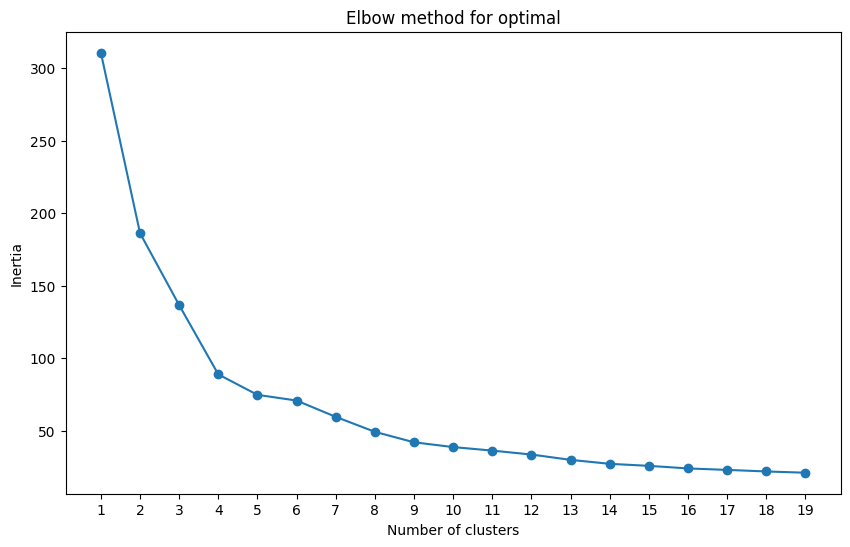

In [13]:
from sklearn.cluster import KMeans
inertia_values = []

cluster_range = range(1, 20)
for k in cluster_range:
    model = KMeans(n_clusters=k, n_init='auto', random_state=42)
    model.fit(df_coef)
    inertia_values.append(model.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal')
plt.xticks(cluster_range)
plt.show()

In [14]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_coef['Cluster'] = kmeans.fit_predict(df_coef)

In [15]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_coef.drop(columns=['Cluster']), df_coef['Cluster'])
print("Silhouette Score:", ((sil_score + 1) / 2) * 100)

Silhouette Score: 69.51845122515363


In [16]:
df_coef.Cluster.value_counts()

3    49
0    46
1    42
2    26
Name: Cluster, dtype: int64

In [17]:
df_['Cluster'] = df_coef['Cluster']

In [18]:
df_

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff,Cluster
Country,,,,,
ABW,8.976353e+08,5.113224e+07,1.152446e+08,-1.476394e+08,4
AGO,4.634761e+09,2.711559e+08,1.538319e+10,2.169301e+10,3
ALB,-1.571333e+09,-6.087597e+07,2.468347e+09,8.630143e+08,10
ARM,-1.745901e+09,1.116702e+08,2.216075e+09,5.721911e+08,10
ATG,1.695626e+08,-7.571696e+06,1.064506e+08,9.263797e+06,4
...,...,...,...,...,...
VUT,1.558788e+08,6.659406e+06,1.001144e+08,4.159328e+07,4
WSM,1.203059e+08,9.652454e+06,1.818198e+08,-7.350840e+06,0
YEM,3.696716e+09,3.526223e+09,9.709729e+09,-3.244607e+09,0


# Dimensionality Reduction

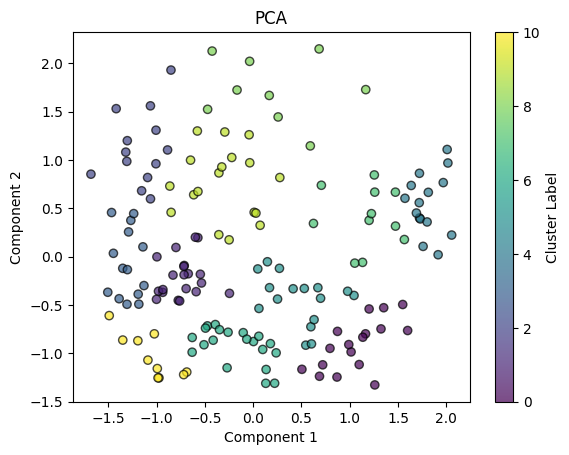

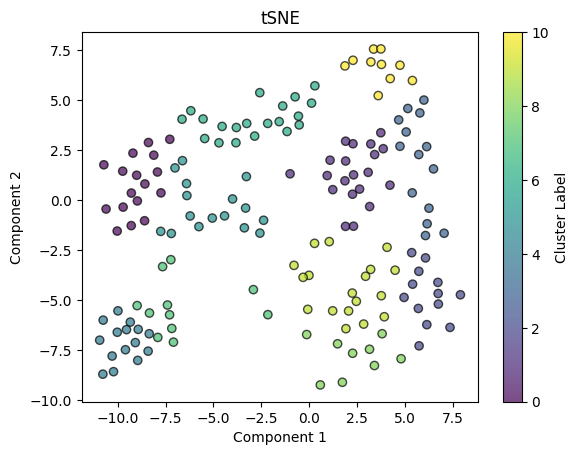

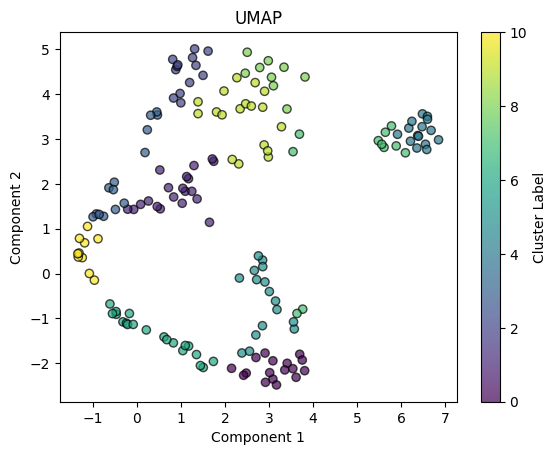

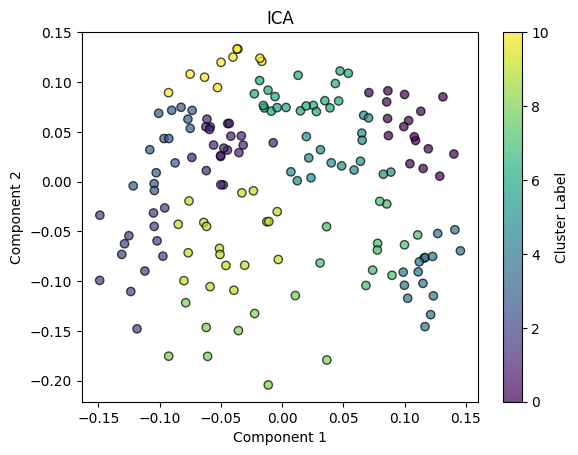

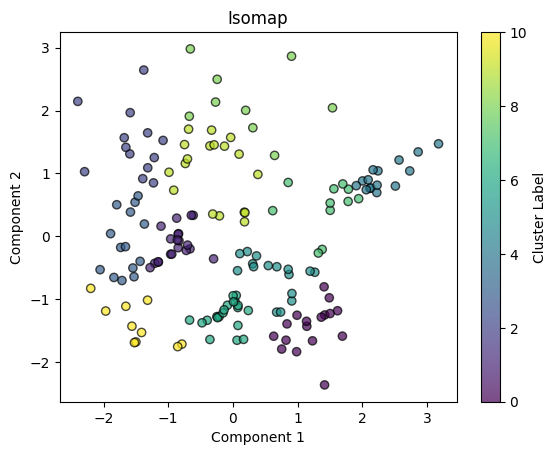

In [19]:

def visualize_dim_red(name, alg, data, clusters):
    al = alg(n_components=2)
    tr = al.fit_transform(data)

    plt.scatter(tr[:, 0], tr[:, 1], c=clusters, cmap='viridis', alpha=0.7, edgecolors='k')

    plt.title(name)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.colorbar(label="Cluster Label")
    plt.show()

algs = {'PCA': PCA, 'tSNE': TSNE, 'UMAP': UMAP, 'ICA': FastICA, 'Isomap': Isomap}

 
clusters = df_coef['Cluster']


df_features = df_coef.drop(columns=['Cluster'])


for name, alg in algs.items():
    visualize_dim_red(name, alg, df_features, clusters)


In [20]:
df

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
ABW,1.679898,-0.447176,-0.286076,-0.946645
AGO,-0.690507,-1.204621,0.575857,1.319271
ALB,-1.362251,-0.331441,1.394625,0.299067
ARM,-1.441604,-0.125310,1.365894,0.201020
ATG,1.383782,-1.064035,0.511639,-0.831386
...,...,...,...,...
VUT,1.402569,-1.219550,0.422664,-0.605684
WSM,0.564638,-0.848947,1.350471,-1.066162
YEM,0.059921,0.022731,1.371557,-1.454209


In [21]:
df_coef

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff,Cluster
Country,,,,,
ABW,1.679898,-0.447176,-0.286076,-0.946645,4
AGO,-0.690507,-1.204621,0.575857,1.319271,3
ALB,-1.362251,-0.331441,1.394625,0.299067,10
ARM,-1.441604,-0.125310,1.365894,0.201020,10
ATG,1.383782,-1.064035,0.511639,-0.831386,4
...,...,...,...,...,...
VUT,1.402569,-1.219550,0.422664,-0.605684,4
WSM,0.564638,-0.848947,1.350471,-1.066162,0
YEM,0.059921,0.022731,1.371557,-1.454209,0


In [22]:
df_['Cluster'] = df_coef['Cluster']

In [23]:
df_

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff,Cluster
Country,,,,,
ABW,8.976353e+08,5.113224e+07,1.152446e+08,-1.476394e+08,4
AGO,4.634761e+09,2.711559e+08,1.538319e+10,2.169301e+10,3
ALB,-1.571333e+09,-6.087597e+07,2.468347e+09,8.630143e+08,10
ARM,-1.745901e+09,1.116702e+08,2.216075e+09,5.721911e+08,10
ATG,1.695626e+08,-7.571696e+06,1.064506e+08,9.263797e+06,4
...,...,...,...,...,...
VUT,1.558788e+08,6.659406e+06,1.001144e+08,4.159328e+07,4
WSM,1.203059e+08,9.652454e+06,1.818198e+08,-7.350840e+06,0
YEM,3.696716e+09,3.526223e+09,9.709729e+09,-3.244607e+09,0


In [24]:
df_.to_csv('clustered_data.csv')

# Dimentionality reduction of PCA

In [25]:
pca = PCA(0.95)
df_pca = pca.fit_transform(df)
df_pca

array([[ 2.01637088e+00,  9.69274139e-01,  9.81686157e-01],
       [-1.26684455e+00,  3.75701391e-01,  1.31734215e-02],
       [-9.92782457e-01, -1.15708533e+00,  7.20516021e-01],
       [-9.75666746e-01, -1.25328263e+00,  9.43403494e-01],
       [ 1.72232242e+00,  4.00630096e-01,  1.40251236e-01],
       [-2.60039191e-01, -7.81369251e-01, -2.11797607e-01],
       [-8.30430134e-01, -1.90072199e-01, -2.52784988e-01],
       [-1.06402542e+00,  1.56027934e+00,  4.35553681e-01],
       [ 5.97629197e-01, -7.24645918e-01, -2.50747760e-01],
       [-5.72651061e-01,  1.96934759e-01, -4.50987217e-01],
       [ 1.63657652e+00,  7.36643522e-01,  1.04663556e-01],
       [-2.48959534e-01,  1.74341038e-01, -5.48636263e-01],
       [-6.32117685e-01, -9.87945704e-01,  1.18883720e-01],
       [-1.49070043e+00, -6.09299867e-01,  7.90479606e-01],
       [ 1.16559230e+00,  1.72815629e+00,  3.87188464e-01],
       [ 1.96826510e+00,  7.66388065e-01,  6.43777448e-01],
       [-1.19406402e+00, -8.69178910e-01

In [26]:
df_pca = pd.DataFrame(df_pca, columns = ['Component 1', 'Component 2', 'Component 3'], index = df.index)
df_pca

,Component 1,Component 2,Component 3
Country,,,
ABW,2.016371,0.969274,0.981686
AGO,-1.266845,0.375701,0.013173
ALB,-0.992782,-1.157085,0.720516
ARM,-0.975667,-1.253283,0.943403
ATG,1.722322,0.400630,0.140251
...,...,...,...
VUT,1.571776,0.604184,0.001337
WSM,1.323574,-0.746790,0.161351
YEM,1.259273,-1.326267,1.070009


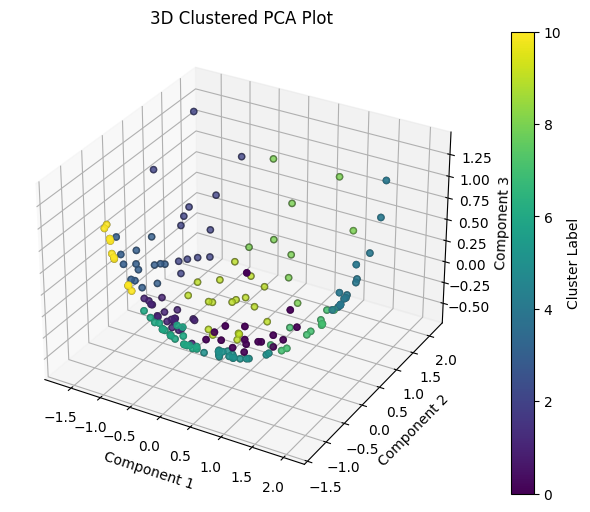

In [27]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 2], 
           c=df_['Cluster'], cmap='viridis', alpha=0.7, edgecolors='k')


ax.set_title("3D Clustered PCA Plot")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")

cbar = plt.colorbar(ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 2], 
                               c=df_['Cluster'], cmap='viridis'))
cbar.set_label("Cluster Label")
plt.savefig("3D_PCA_Cluster.png", dpi=300, bbox_inches='tight')
plt.show()


# Dimentionality reduction of UMAP

In [28]:
umap = UMAP(n_components = 3, random_state = 42)
df_umap = umap.fit_transform(df)
df_umap

array([[ 5.47127295e+00,  7.60185480e+00,  1.47624028e+00],
       [ 4.29080456e-01,  3.09286785e+00,  4.20892668e+00],
       [ 8.37527215e-03,  4.45264637e-01,  4.53726387e+00],
       [-8.31648335e-02,  4.54341739e-01,  4.54578543e+00],
       [ 5.00274086e+00,  7.33755779e+00,  1.67962837e+00],
       [ 3.87238598e+00,  1.41666949e+00,  5.90804911e+00],
       [ 1.73322403e+00,  2.12650347e+00,  3.22716427e+00],
       [ 2.58232355e-01,  4.60269833e+00,  4.18307400e+00],
       [ 5.08828449e+00,  3.43495703e+00,  5.43489981e+00],
       [ 1.97472787e+00,  3.23307419e+00,  3.62914228e+00],
       [ 5.09711313e+00,  7.58547354e+00,  1.97660542e+00],
       [ 2.52522707e+00,  3.89636540e+00,  3.84748793e+00],
       [ 3.14293742e+00,  9.79977190e-01,  5.66126776e+00],
       [-5.08184638e-03,  8.82980943e-01,  4.16280985e+00],
       [ 1.65204537e+00,  5.91435289e+00,  3.59162068e+00],
       [ 5.41168165e+00,  7.58252192e+00,  1.45987225e+00],
       [ 2.36392543e-01,  6.23791397e-01

In [29]:
df_umap = pd.DataFrame(df_umap, columns = ['Component 1', 'Component 2', 'Component 3'], index = df.index)

In [30]:
df_umap

,Component 1,Component 2,Component 3
Country,,,
ABW,5.471273,7.601855,1.476240
AGO,0.429080,3.092868,4.208927
ALB,0.008375,0.445265,4.537264
ARM,-0.083165,0.454342,4.545785
ATG,5.002741,7.337558,1.679628
...,...,...,...
VUT,4.986341,7.343403,2.163412
WSM,6.101662,3.887552,5.940578
YEM,6.048141,3.534111,6.404713


In [31]:
print(df_.columns)


Index(['Population_Coeff', 'Inflation_Coeff', 'Import_Coeff', 'Export_Coeff',
       'Cluster'],
      dtype='object')


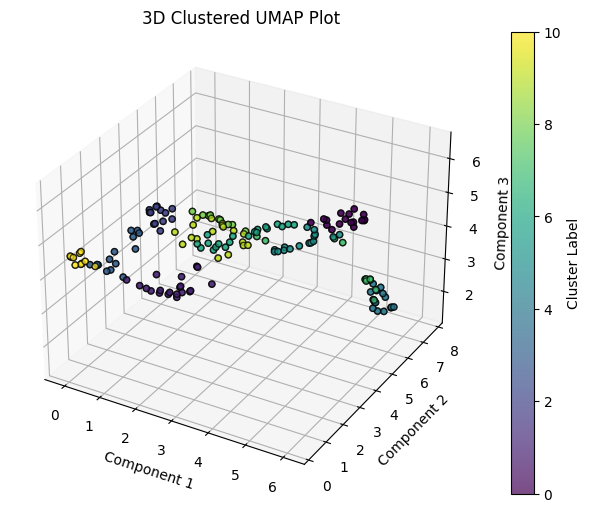

In [32]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df_umap.iloc[:,0], df_umap.iloc[:,1], df_umap.iloc[:,2], c = df_['Cluster'], cmap = 'viridis', alpha = 0.7, edgecolors = 'k')

cbar = plt.colorbar(ax.scatter(df_umap.iloc[:,0], df_umap.iloc[:,1], df_umap.iloc[:,2], c = df_['Cluster'], cmap = 'viridis', alpha = 0.7, edgecolors = 'k'))
cbar.set_label('Cluster Label')


ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D Clustered UMAP Plot')
plt.savefig("3D_UMAP_Cluster.png", dpi=300, bbox_inches='tight')
plt.show()

# Dimentionality reduction of Isomap

In [33]:
isomap = Isomap(n_components=3) 
df_isomap = isomap.fit_transform(df)
df_isomap

array([[ 2.86224495e+00,  1.34269310e+00,  4.70307733e-01],
       [-1.51258595e+00,  5.42788990e-01, -7.31689659e-02],
       [-1.41175399e+00, -1.52724630e+00,  6.96191543e-01],
       [-1.49958668e+00, -1.67797026e+00,  7.19953227e-01],
       [ 2.11652675e+00,  7.63789461e-01,  2.77302009e-01],
       [-8.51297196e-02, -1.09473678e+00,  7.92440213e-02],
       [-9.62258718e-01, -3.95675896e-02, -5.65049342e-01],
       [-1.58773167e+00,  1.96630681e+00,  3.46225061e-01],
       [ 9.09009148e-01, -1.02585271e+00, -1.01867614e-01],
       [-6.13697819e-01,  3.34856036e-01, -5.10186205e-01],
       [ 2.00219567e+00,  8.81315624e-01,  2.85760643e-01],
       [-2.08450224e-01,  3.26001687e-01, -7.67589903e-01],
       [-6.70002430e-01, -1.33024666e+00,  5.85367438e-01],
       [-2.19722887e+00, -8.26349205e-01,  1.42686486e-01],
       [ 1.53842164e+00,  2.04351380e+00, -2.59904825e-02],
       [ 2.56656840e+00,  1.21345957e+00,  4.71229362e-01],
       [-1.65481236e+00, -1.11094704e+00

In [34]:
df_isomap = pd.DataFrame(df_isomap, columns = ['Component 1', 'Component 2', 'Component 3'], index = df.index)

In [35]:
df_isomap

,Component 1,Component 2,Component 3
Country,,,
ABW,2.862245,1.342693,0.470308
AGO,-1.512586,0.542789,-0.073169
ALB,-1.411754,-1.527246,0.696192
ARM,-1.499587,-1.677970,0.719953
ATG,2.116527,0.763789,0.277302
...,...,...,...
VUT,1.905769,0.805984,0.167523
WSM,1.501132,-1.226304,-0.163349
YEM,1.415870,-2.360735,0.103130


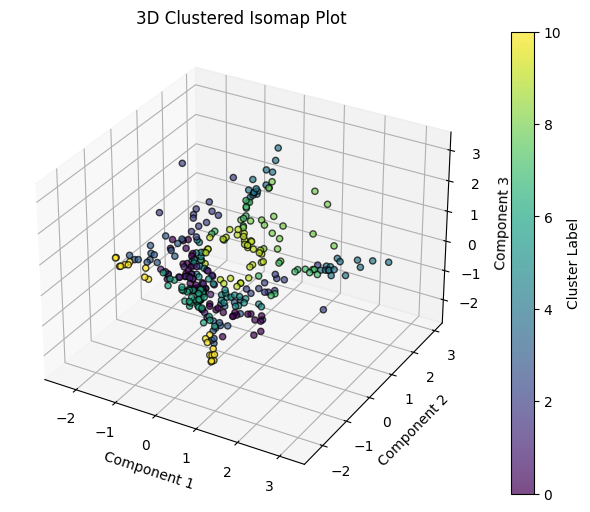

In [36]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df_isomap.iloc[:,2], df_isomap.iloc[:,1], df_isomap.iloc[:,0], c = df_['Cluster'], cmap = 'viridis', alpha = 0.7, edgecolors = 'k')

cbar = plt.colorbar(ax.scatter(df_isomap.iloc[:,0], df_isomap.iloc[:,1], df_isomap.iloc[:,2], c = df_['Cluster'], cmap = 'viridis', alpha = 0.7, edgecolors = 'k'))
cbar.set_label('Cluster Label')


ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D Clustered Isomap Plot')
plt.savefig("3D_Isomap_Cluster.png", dpi=300, bbox_inches='tight')
plt.show()